In [2]:
import pickle
import os
import pandas as pd

# Directory containing the simulation files
directory = "/sietch_colab/akapoor/Demographic_Inference/examining_outliers/final_LD_inferences/"

# Initialize a list to store results
results = []

# Loop through all files in the directory with the desired prefix
for filename in os.listdir(directory):
    if filename.startswith("momentsLD_inferences_sim_") and filename.endswith(".pkl"):
        file_path = os.path.join(directory, filename)
        
        # Extract the simulation number from the filename
        sim_number = filename.split("_")[-1].replace(".pkl", "")
        
        # Load the data from the pickle file
        with open(file_path, 'rb') as f:
            data = pickle.load(f)

        # Extract simulated and computed parameters
        simulated_params = data.get('simulated_params', {})
        computed_params_list = data.get('opt_params_momentsLD', [])
        
        if not computed_params_list:
            print(f"No computed parameters found in {filename}. Skipping.")
            continue
        
        # Assuming the first set of computed parameters is of interest
        computed_params = computed_params_list[0]

        # Calculate differences
        for param in simulated_params:
            if param in computed_params:  # Ensure the parameter exists in both
                simulated_value = simulated_params[param]
                computed_value = computed_params[param]
                abs_diff = abs(simulated_value - computed_value)
                rel_diff = abs_diff / simulated_value if simulated_value != 0 else None  # Avoid division by zero
                
                # Append the results to the list
                results.append({
                    'simulation_number': sim_number,
                    'parameter': param,
                    'simulated_value': simulated_value,
                    'computed_value': computed_value,
                    'absolute_difference': abs_diff,
                    'relative_difference': rel_diff
                })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# # Save the DataFrame to a CSV file
# output_csv = "/sietch_colab/akapoor/Demographic_Inference/relative_differences.csv"
# df.to_csv(output_csv, index=False)

# print(f"Results saved to {output_csv}")


In [3]:
df

,simulation_number,parameter,simulated_value,computed_value,absolute_difference,relative_difference
0,273,t_split,5163,5.137296e+03,2.570405e+01,0.004979
1,273,N1,19870,2.008828e+04,2.182844e+02,0.010986
2,273,N2,12805,1.307966e+04,2.746644e+02,0.021450
3,273,Na,17482,1.804577e+04,5.637666e+02,0.032248
4,273,m,0,5.157338e-07,5.157338e-07,NaN
...,...,...,...,...,...,...
2495,241,t_split,1899,1.954950e+03,5.594978e+01,0.029463
2496,241,N1,7006,7.207402e+03,2.014018e+02,0.028747
2497,241,N2,22981,2.382425e+04,8.432463e+02,0.036693
2498,241,Na,17597,1.785060e+04,2.535986e+02,0.014411


In [4]:
# Sort the DataFrame by simulation number and then by parameter
df = df.sort_values(by=['simulation_number', 'parameter'])

# Save the sorted DataFrame to a CSV file
# output_csv = "/sietch_colab/akapoor/Demographic_Inference/relative_differences_sorted.csv"
# df.to_csv(output_csv, index=False)

# print(f"Sorted results saved to {output_csv}")


In [5]:
df

,simulation_number,parameter,simulated_value,computed_value,absolute_difference,relative_difference
1321,0,N1,22898,2.346269e+04,5.646908e+02,0.024661
1322,0,N2,6954,7.044219e+03,9.021858e+01,0.012974
1323,0,Na,29078,2.968450e+04,6.064984e+02,0.020858
1324,0,m,0,3.211994e-07,3.211994e-07,NaN
1320,0,t_split,9524,9.743210e+03,2.192105e+02,0.023017
...,...,...,...,...,...,...
21,99,N1,25756,2.638621e+04,6.302127e+02,0.024469
22,99,N2,23273,2.271406e+04,5.589409e+02,0.024017
23,99,Na,22079,2.236899e+04,2.899881e+02,0.013134
24,99,m,0,4.345045e-07,4.345045e-07,NaN


In [7]:
import numpy as np
np.max(df['relative_difference'])

9791238106.579823

(array([821., 463., 198., 108.,  46.,  31.,  22.,  19.,  18.,  10.,   8.,
          8.,   5.,   4.,   7.,   5.,   4.,   7.,   2.,   4.,   7.,   4.,
          4.,   3.,   1.,   4.,   5.,   3.,   6.,   4.,   3.,   4.,   3.,
          2.,   0.,   3.,   5.,   4.,   3.,   0.,   6.,   6.,   2.,   5.,
          0.,   2.,   4.,   2.,   2.,   3.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

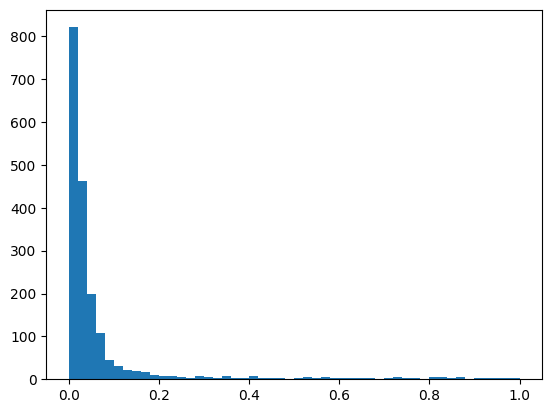

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df['relative_difference'], bins=50, range=(0, 1))

In [20]:
# Ensure 'simulation_number' is an integer
df['simulation_number'] = pd.to_numeric(df['simulation_number'])

# Filter rows where 'relative_difference' > 1.0 and get unique simulation numbers as integers
unique_simulations = df[df['relative_difference'] > 1.5]['simulation_number'].unique()

print(unique_simulations)
print(f'Fraction of the simulations that have at least one parameter with relative difference > 1.0: {len(unique_simulations) / len(df["simulation_number"].unique())}')

[112 148 149 161 178 181 182 192 199 201 212 219 224 232 256 275 279 299
 302 349  35 351 352 355 360 368 393 399 419 429 439  44 445 446 451 468
 469 472 476 480 489  49 490 495 497  56   6  63  64  81  83]
Fraction of the simulations that have at least one parameter with relative difference > 1.0: 0.102


In [17]:
df[df['simulation_number'] == 112]

,simulation_number,parameter,simulated_value,computed_value,absolute_difference,relative_difference
1346,112,N1,21409,6.455007e+04,4.314107e+04,2.015090
1347,112,N2,28938,7.005482e+04,4.111682e+04,1.420859
1348,112,Na,5601,2.224092e+05,2.168082e+05,38.708832
1349,112,m,0,4.963977e-08,4.963977e-08,NaN
1345,112,t_split,19767,3.397827e+04,1.421127e+04,0.718939


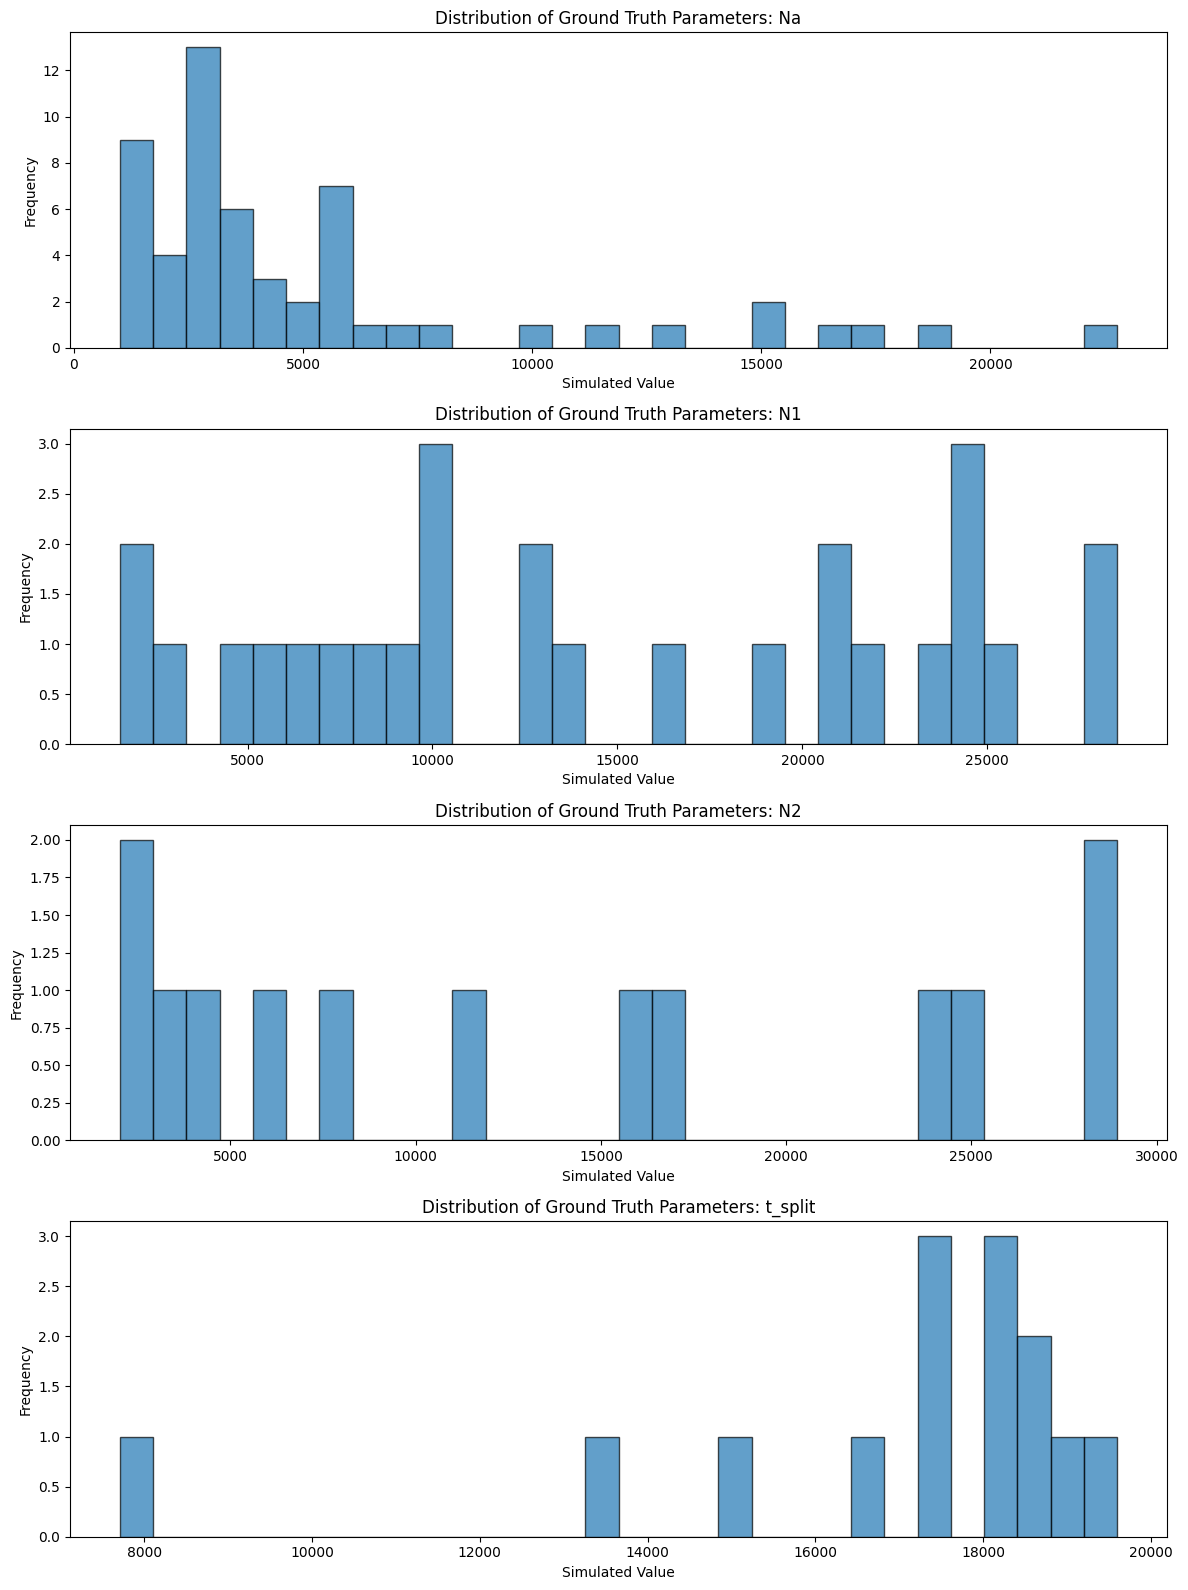

In [26]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_df = df[(df['relative_difference'] >1) & (df['parameter'] != 'm')]

# Get the unique parameters excluding 'm'
parameters = filtered_df['parameter'].unique()

# Create subplots for each parameter
plt.figure(figsize=(12, len(parameters) * 4))
for i, param in enumerate(parameters, 1):
    plt.subplot(len(parameters), 1, i)
    # Filter by parameter and plot the distribution of simulated values
    param_data = filtered_df[filtered_df['parameter'] == param]['simulated_value']
    plt.hist(param_data, bins=30, alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of Ground Truth Parameters: {param}")
    plt.xlabel("Simulated Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


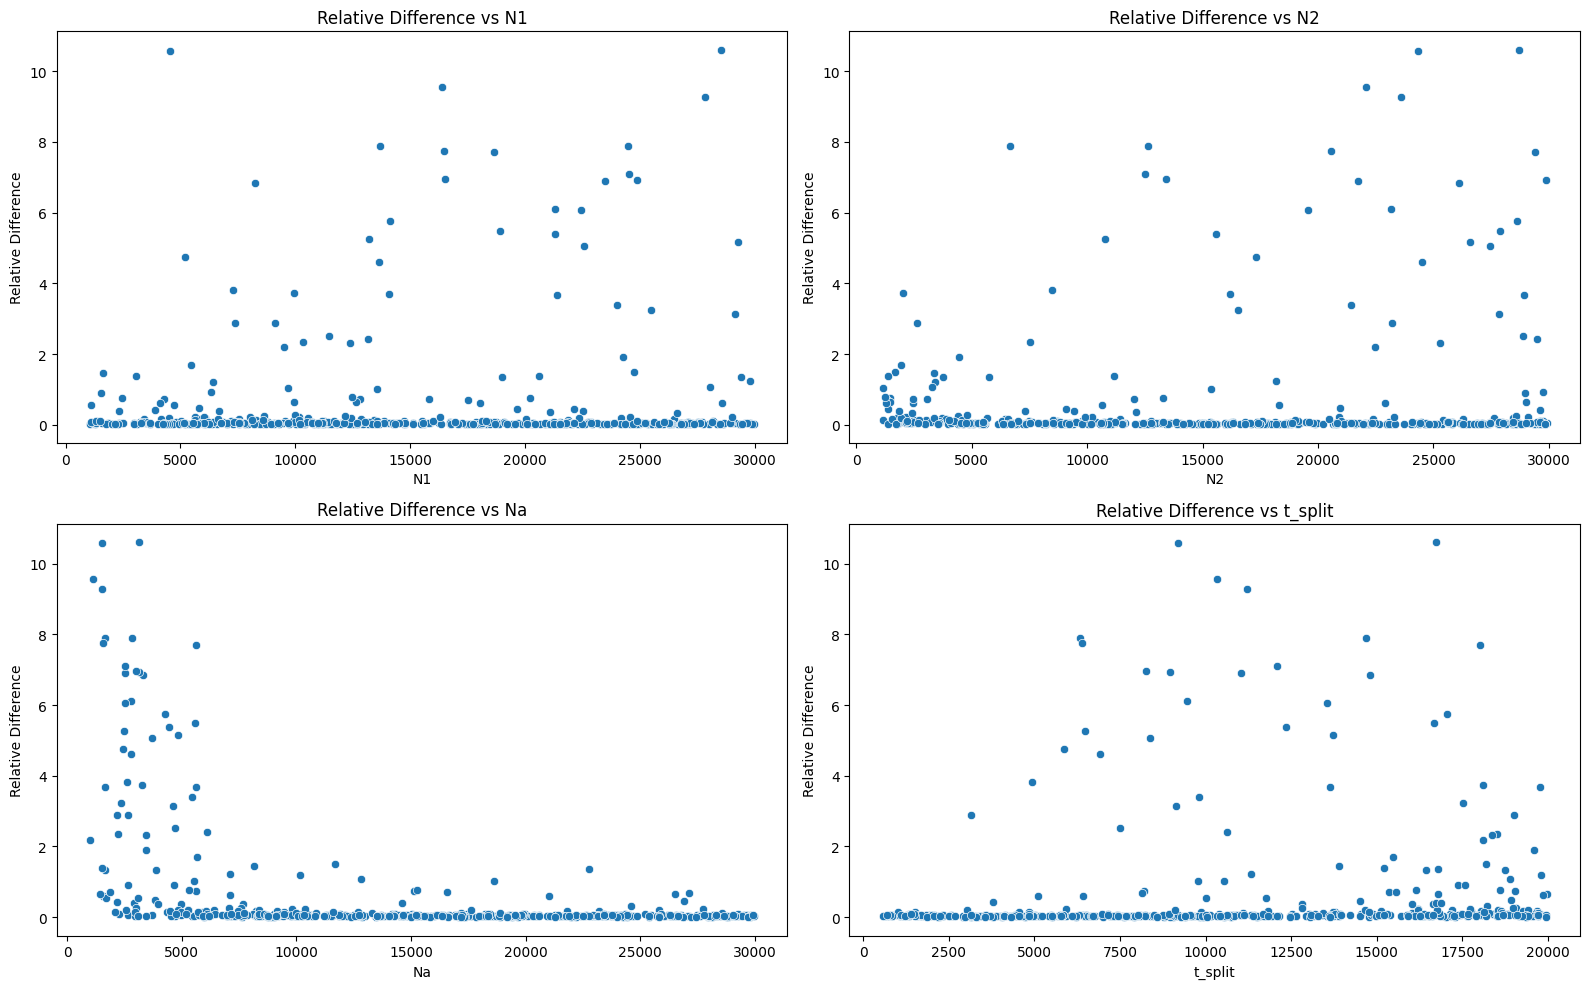

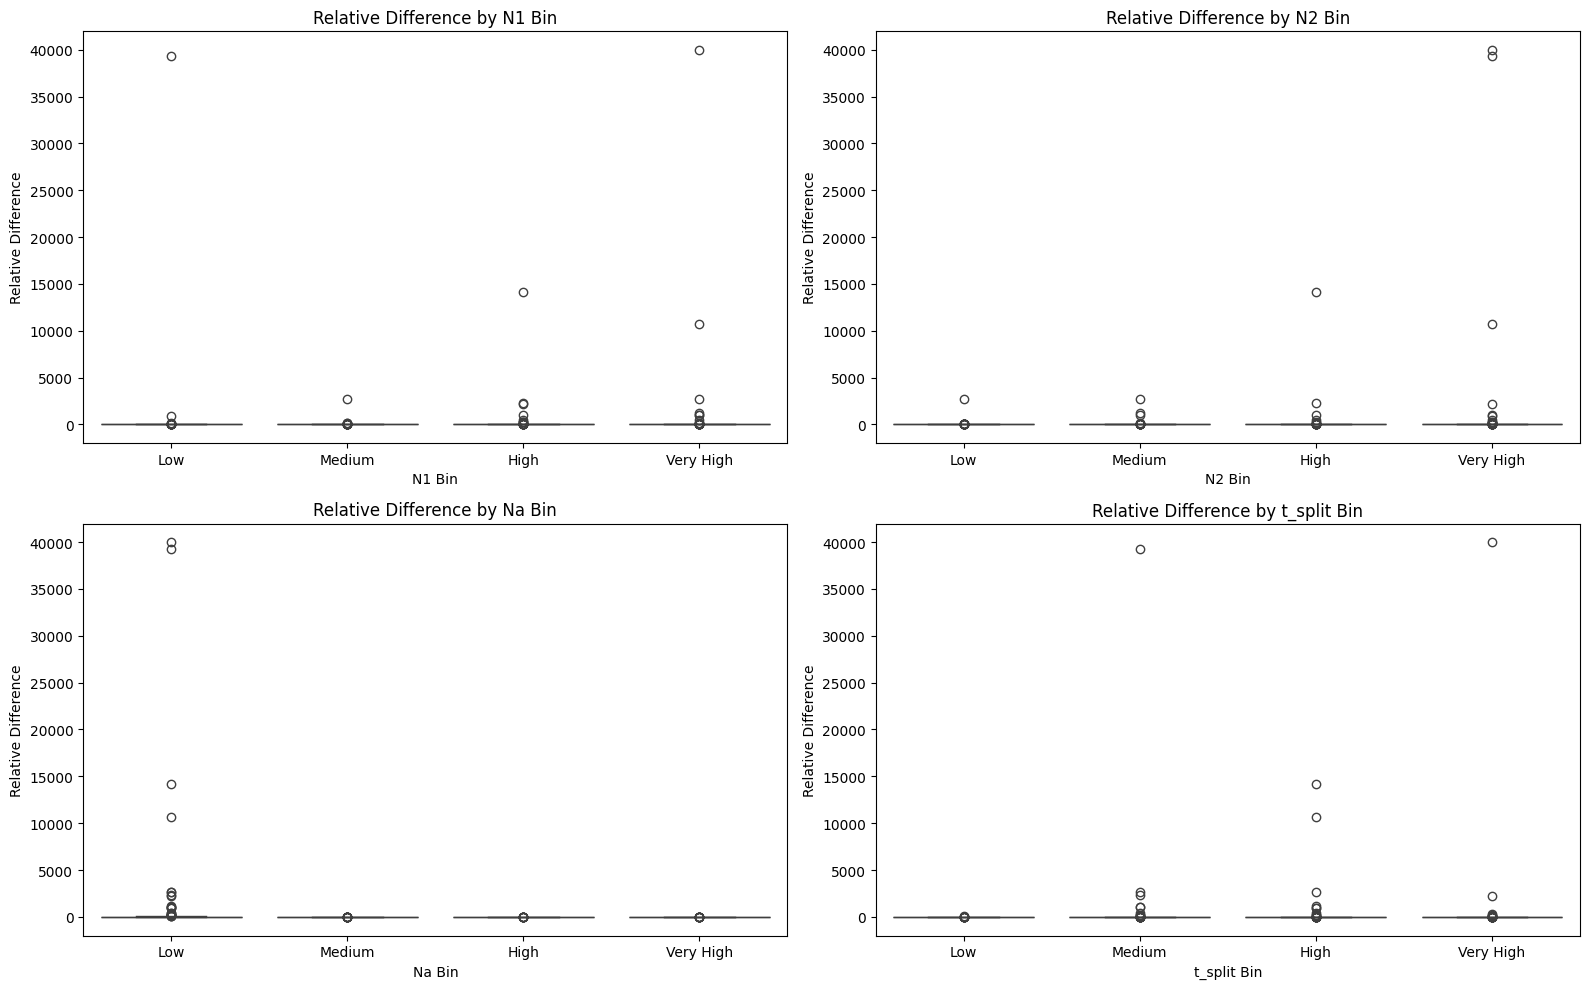

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out parameter `m` if not already excluded
filtered_df = df[df['parameter'] != 'm']

# Pivot the DataFrame to get simulation_number-wise rows for relative differences and parameters
pivot_df = filtered_df.pivot(index='simulation_number', columns='parameter', values='simulated_value').reset_index()
pivot_df['relative_difference'] = df.groupby('simulation_number')['relative_difference'].max()
pivot_df = pivot_df[pivot_df['relative_difference'] < 1e6]  # Adjust the threshold as needed
# Scatter plots for relative difference vs each parameter
plt.figure(figsize=(16, 10))
for i, param in enumerate(['N1', 'N2', 'Na', 't_split'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=pivot_df[param], y=np.log1p(pivot_df['relative_difference']))
    plt.title(f"Relative Difference vs {param}")
    plt.xlabel(param)
    plt.ylabel('Relative Difference')

plt.tight_layout()
plt.show()

# Bin the parameter ranges to analyze trends
for param in ['N1', 'N2', 'Na', 't_split']:
    pivot_df[f'{param}_bin'] = pd.qcut(pivot_df[param], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


# Boxplots for binned parameters
plt.figure(figsize=(16, 10))
for i, param in enumerate(['N1', 'N2', 'Na', 't_split'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=pivot_df[f'{param}_bin'], y=pivot_df['relative_difference'])
    plt.title(f"Relative Difference by {param} Bin")
    plt.xlabel(f'{param} Bin')
    plt.ylabel('Relative Difference')

plt.tight_layout()
plt.show()


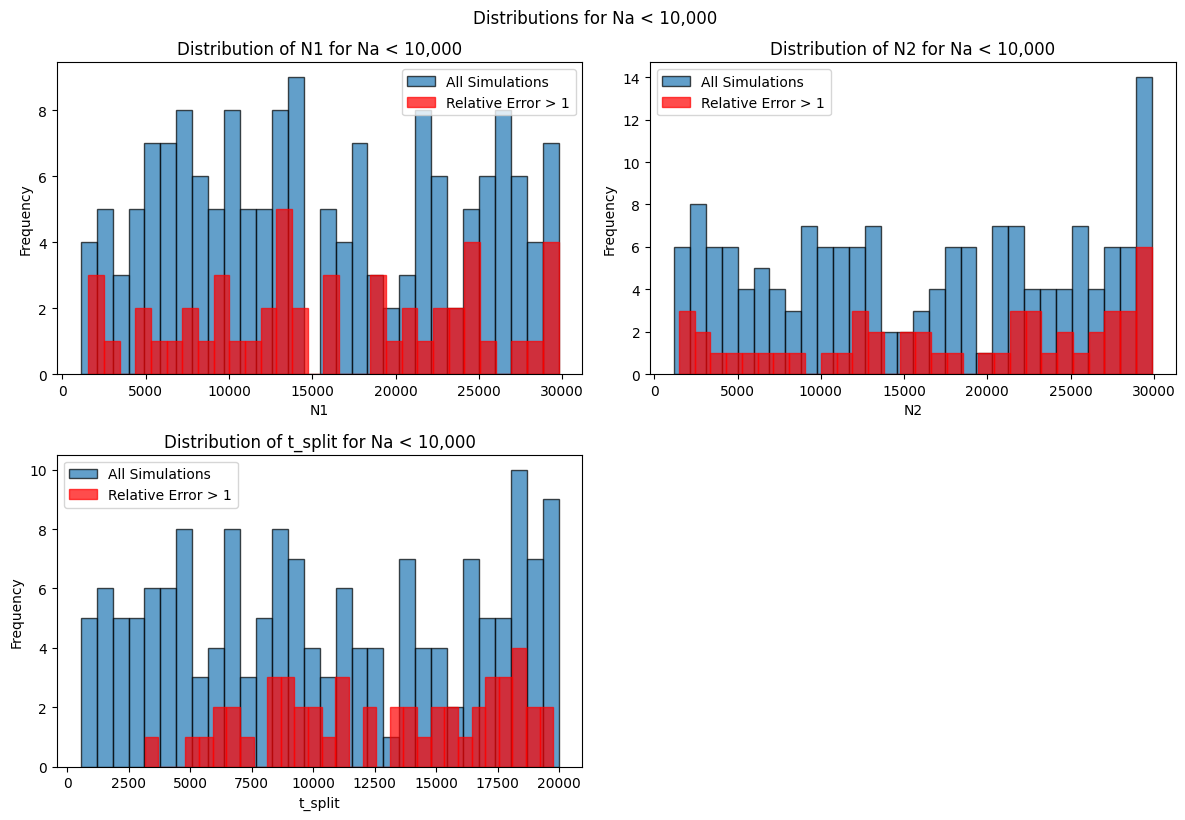

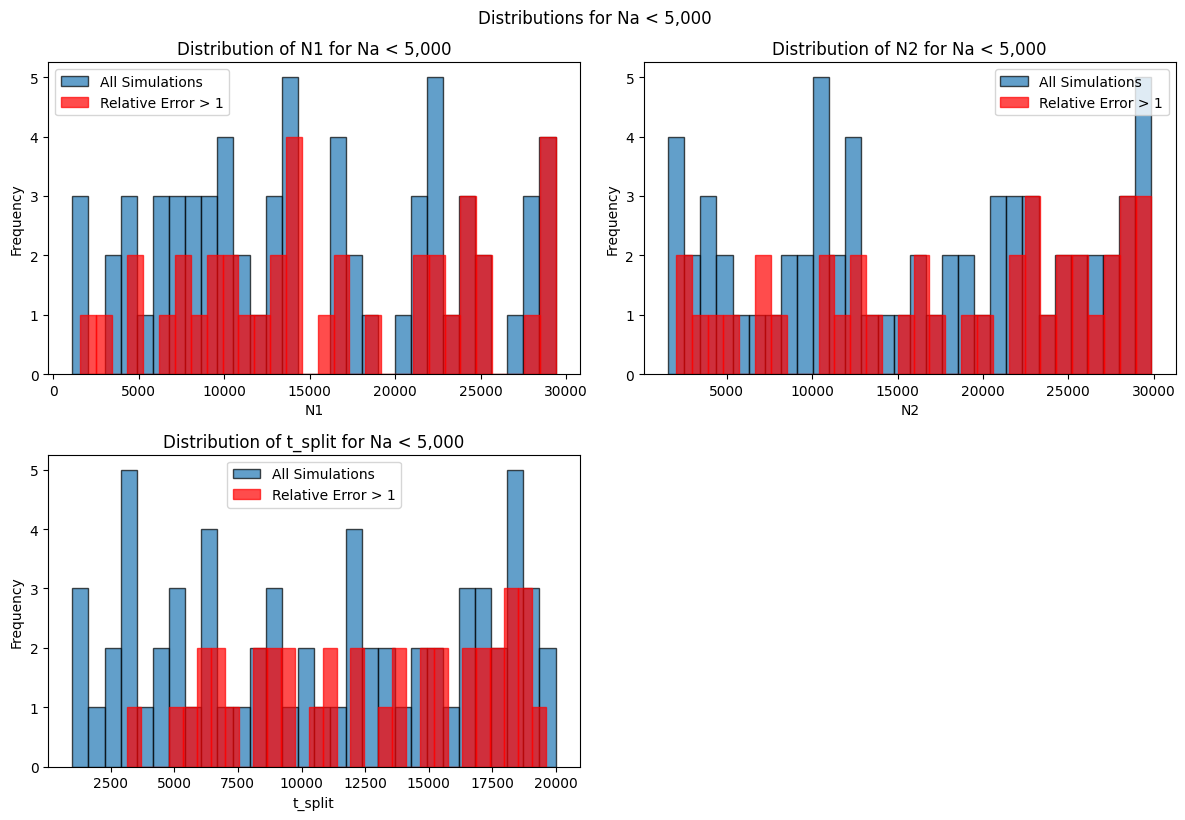

In [35]:
import matplotlib.pyplot as plt

# Filter simulations with Na < 10,000
low_na_10000 = pivot_df[pivot_df['Na'] < 10000]
low_na_10000_high_error = low_na_10000[low_na_10000['relative_difference'] > 1]

# Filter simulations with Na < 5,000
low_na_5000 = pivot_df[pivot_df['Na'] < 5000]
low_na_5000_high_error = low_na_5000[low_na_5000['relative_difference'] > 1]

# Plot distributions for Na < 10,000
plt.figure(figsize=(12, 8))
for i, param in enumerate(['N1', 'N2', 't_split'], 1):
    plt.subplot(2, 2, i)
    plt.hist(low_na_10000[param], bins=30, alpha=0.7, edgecolor='black', label='All Simulations')
    plt.hist(low_na_10000_high_error[param], bins=30, alpha=0.7, edgecolor='red', color='red', label='Relative Error > 1')
    plt.title(f"Distribution of {param} for Na < 10,000")
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.suptitle("Distributions for Na < 10,000", y=1.02)
plt.show()

# Plot distributions for Na < 5,000
plt.figure(figsize=(12, 8))
for i, param in enumerate(['N1', 'N2', 't_split'], 1):
    plt.subplot(2, 2, i)
    plt.hist(low_na_5000[param], bins=30, alpha=0.7, edgecolor='black', label='All Simulations')
    plt.hist(low_na_5000_high_error[param], bins=30, alpha=0.7, edgecolor='red', color='red', label='Relative Error > 1')
    plt.title(f"Distribution of {param} for Na < 5,000")
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.suptitle("Distributions for Na < 5,000", y=1.02)
plt.show()
